In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Load the dataset

In [73]:
Y = np.loadtxt('gatlin.csv', delimiter=',')
print('X is of shape {}'.format(Y.shape))
print(Y)

X is of shape (480, 640)
[[30. 31. 29. ... 55. 54. 56.]
 [30. 30. 29. ... 53. 53. 53.]
 [30. 30. 28. ... 52. 52. 52.]
 ...
 [13. 13. 13. ... 26. 25. 26.]
 [15. 15. 15. ... 28. 28. 28.]
 [17. 18. 18. ... 27. 28. 27.]]


In [3]:
type(X)

numpy.ndarray

## TODO: Perform SVD on the X matrix
Instructions: Perform SVD decomposition of matrix X. 
## Save the three factors in variables U, S and V

In [74]:
# YOUR CODE HERE
U,S,V=np.linalg.svd(Y)

print(f'shape of U {U.shape},shape of V {V.shape},shape of S {S.shape}')

shape of U (480, 480),shape of V (640, 640),shape of S (480,)


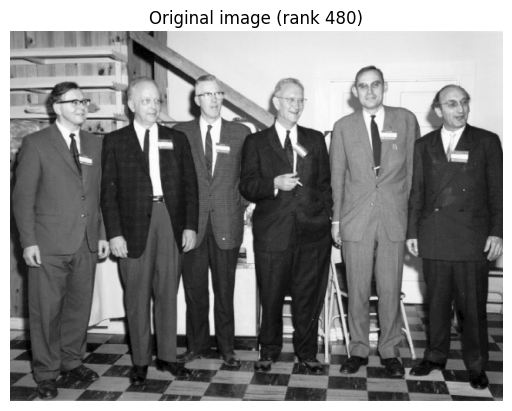

In [75]:
# Plot the original image
plt.figure(1)
plt.imshow(Y, cmap=cm.Greys_r)
plt.title('Original image (rank 480)')
plt.axis('off')
plt.draw()

Matrix reconstruction using the top k = [10, 20, 50, 100, 200] singular values

## TODO: Create four matrices X10, X20, X50, X100, X200 for each low rank approximation

In [57]:
X=[]

In [20]:
U[:,:10].shape

(480, 10)

In [28]:
S[:10].shape

(10,)

In [17]:
V[:,:10].T.shape

(10, 640)

In [31]:
np.dot(np.dot(U[:,:10],np.diag(S)[:10,:10]),(V[:,:10].T))

array([[ 39.19142738, -35.73962995,  30.38556396, ..., -25.57145594,
         -9.97950187, -78.8198523 ],
       [ 38.67025364, -35.28171922,  30.01162415, ..., -25.32243489,
         -9.73252933, -78.29419693],
       [ 38.40944869, -35.07946137,  29.85062499, ..., -25.34673316,
         -9.83076647, -78.10360101],
       ...,
       [ 21.23299579, -18.38145583,  15.37631196, ..., -21.54799526,
         -5.55554214, -27.85521498],
       [ 23.83246663, -20.22989407,  16.83697813, ..., -23.33697365,
         -6.84486816, -28.10620897],
       [ 26.49923119, -22.35855189,  18.54237378, ..., -25.64178733,
         -7.90453173, -28.25598121]])

In [81]:
temp=[]

In [58]:
# YOUR CODE HERE

k=[10,20,50,100,200]

for i in k:
    value=np.dot(np.dot(U[:,:i],np.diag(S)[:i,:i]),(V[:i,:]))
    X.append(value)

In [84]:
np.diag(S)[:i,:i].shape

(10, 10)

In [86]:
U[:,:i].shape

(480, 10)

In [88]:
V[:i,:].shape

(10, 640)

In [83]:
for i in k:
    value=np.matmul(U[:,:i],np.diag(S)[:i,:i],V[:i,:])
    temp.append(value)

ValueError: matmul: Output operand 0 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 480)

In [54]:
X

[array([[ 39.19142738, -35.73962995,  30.38556396, ..., -25.57145594,
          -9.97950187, -78.8198523 ],
        [ 38.67025364, -35.28171922,  30.01162415, ..., -25.32243489,
          -9.73252933, -78.29419693],
        [ 38.40944869, -35.07946137,  29.85062499, ..., -25.34673316,
          -9.83076647, -78.10360101],
        ...,
        [ 21.23299579, -18.38145583,  15.37631196, ..., -21.54799526,
          -5.55554214, -27.85521498],
        [ 23.83246663, -20.22989407,  16.83697813, ..., -23.33697365,
          -6.84486816, -28.10620897],
        [ 26.49923119, -22.35855189,  18.54237378, ..., -25.64178733,
          -7.90453173, -28.25598121]]),
 array([[ 37.60986565, -35.13362468,  29.8050634 , ..., -26.06226695,
         -13.53137031, -80.6406167 ],
        [ 36.89145215, -34.55928925,  29.35230503, ..., -25.82632291,
         -13.35321699, -80.18851965],
        [ 36.68453782, -34.30124576,  29.22341551, ..., -25.79820142,
         -13.38145954, -79.88057553],
        ...,


In [59]:
import pandas as pd

In [60]:
values=pd.Series(X,index=k)

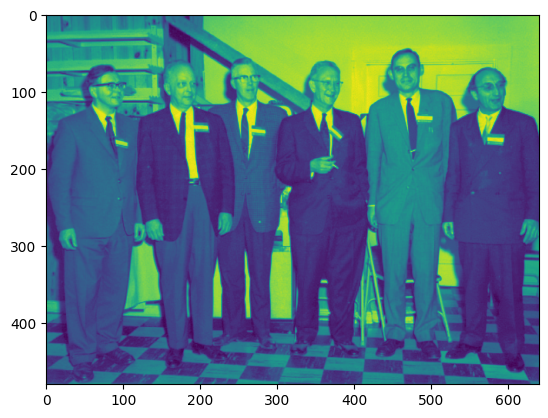

In [61]:
plt.imshow(values[200])

Error of approximation
## TODO: Compute and print the error of each low rank approximation of the matrix
The Frobenius error can be computed as $\frac{||X - X_k||}{||X||}$


In [62]:
# YOUR CODE HERE
for i in values.index:
    print(f'the relative error for X_{i} is {(np.linalg.norm(X-values[i])/np.linalg.norm(X)):.4f}')

the relative error for X_10 is 0.1577
the relative error for X_20 is 0.1156
the relative error for X_50 is 0.1033
the relative error for X_100 is 0.1063
the relative error for X_200 is 0.1088


Text(0.5, 1.0, 'Original picture')

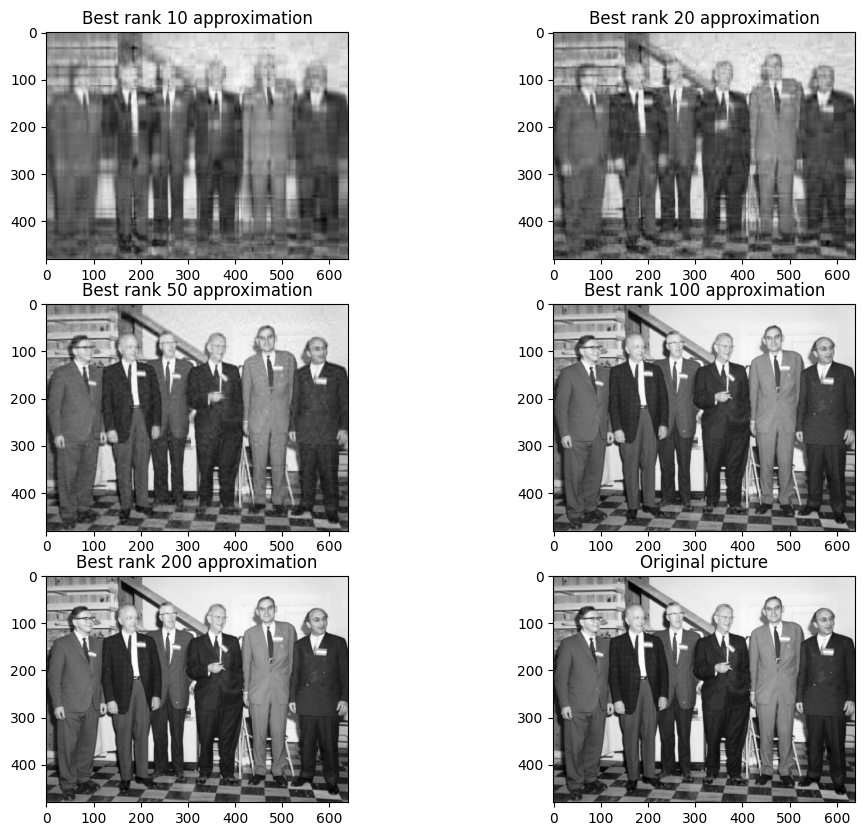

In [76]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
ranks = [10, 20, 50, 100, 200]
axs = axs.ravel()

for i in range(0,5):
    axs[i].imshow(values[ranks[i]], cmap=cm.Greys_r)
    axs[i].set_title(f'Best rank {ranks[i]} approximation')
    
axs[5].imshow(Y,cmap=cm.Greys_r)
axs[5].set_title(f'Original picture')

Plot the singular values of the original matrix
## TODO: Plot the singular values of X versus their rank k

In [79]:
np.arange(len(S)) + 1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Text(0.5, 1.0, 'Singular values of the "gatlin" image matrix')

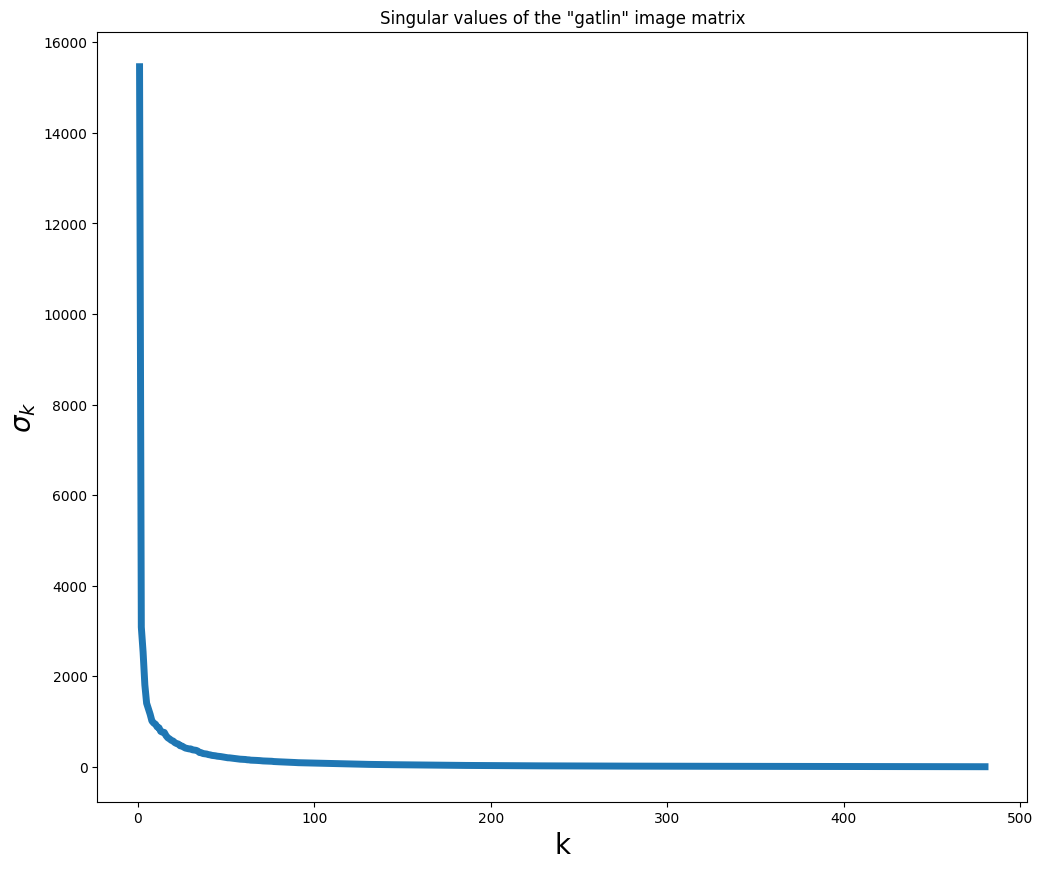

In [78]:
# YOUR CODE HERE

fig, ax = plt.subplots(figsize=(12, 10)) 
ax.plot(np.arange(len(S)) + 1, S, linewidth=5)
plt.xlabel('k', fontsize=20)
plt.ylabel('$\sigma_k$', fontsize=20)
plt.title('Singular values of the "gatlin" image matrix')